In [1]:
import cupy as cp
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
n = np.arange(100,10000,100)
rep = 100
tiempo_np = []
tiempo_cp = []
for i in n:
    a_np = np.random.rand(i)
    b_np = np.random.rand(i)
    a_cp = cp.random.rand(i)
    b_cp = cp.random.rand(i)
    #primero con numpy
    start = time.time()
    for j in range(rep):
        ccov = np.correlate(a_np - a_np.mean(), b_np - b_np.mean(), mode='full')
    end = time.time()
    tiempo_np.append((end-start)/rep)
    #despues con cupy
    start = time.time()
    for j in range(rep):
        ccov2 = cp.correlate(a_cp - a_cp.mean(), b_cp - b_cp.mean(), mode='full')
    end = time.time()
    tiempo_cp.append((end-start)/rep)

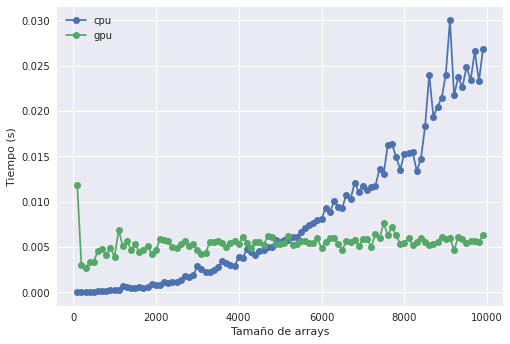

In [3]:
plt.plot(n,tiempo_np,'-o',label='cpu')
plt.plot(n,tiempo_cp,'-o',label='gpu')
plt.xlabel('Tamaño de arrays')
plt.ylabel('Tiempo (s)')
plt.savefig('tiempos.png')
plt.legend()